In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from pathlib import Path
import trackpy
from iris.time import PartialDateTime
import cartopy.crs as ccrs
import xarray as xr
import netCDF4 as nc
import scipy
from scipy import ndimage
from scipy.ndimage import label, generate_binary_structure
import seaborn as sns

#import packages that output memory usage:
#from sys import getsizeof

import tobac #tobac package cloned from https://github.com/tobac-project/tobac.git

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", 53)

In [3]:
## load in new dataframes with 1 row per MCS ##
eamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/eamz_tracks_cpm.hdf', 'table')
wamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/wamz_tracks_cpm.hdf', 'table')
neb_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/neb_tracks_cpm.hdf', 'table')
#seb_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/per_mcs_seb_tracks_cpm.hdf', 'table')
#lpb_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/per_mcs_lpb_tracks_cpm.hdf', 'table')

eamz_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/eamz_tracks_pd.hdf', 'table')
wamz_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/wamz_tracks_pd.hdf', 'table')
neb_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/neb_tracks_pd.hdf', 'table')
#seb_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/per_mcs_seb_tracks_pd.hdf', 'table')
#lpb_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/per_mcs_lpb_tracks_pd.hdf', 'table')

eamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/eamz_tracks_obs.hdf', 'table')
wamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/wamz_tracks_obs.hdf', 'table')
neb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/neb_tracks_obs.hdf', 'table')
#seb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_seb_tracks_obs.hdf', 'table')
#lpb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_lpb_tracks_obs.hdf', 'table')


In [4]:
eamz_tracks_cpm[eamz_tracks_cpm.cell == 200116]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,total_precip,rain_flag,convective_precip,heavy_precip,extreme_precip,heavy_rain_flag,extreme_rain_flag,max_precip,mean_precip_total,mean_precip,tb_min,tb_mean,tb_210,tb_200,tb_190,tb_180,w_max,w_min,w_mean,w_mean_up,w_mean_down,w_up_area,w_down_area,w_0.1_up,w_1_up,w_5_up,w_0.1_down,w_1_down,w_5_down,datetime,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_w_down_lat,max_w_down_lon,colocated_pixels
31,2,124,717.927725,695.554445,21717,240,32,2001-01-01 02:30:00,2001-01-01 02:30:00,-10.963977,-56.870003,200116,0 days 00:00:00,7.866571e+03,821,7656.430664,5136.735840,1232.795898,206,19,8.960225e+01,2.204756e+00,9.325738,188.930908,215.122589,1404,718,60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 02:30:00,-9.15,-56.450001,-9.55,-56.349998,0,0,0,0,617
43,3,83,707.899711,676.785055,27282,240,44,2001-01-01 03:30:00,2001-01-01 03:30:00,-11.370112,-57.630165,200116,0 days 01:00:00,8.874375e-08,0,0.000000,0.000000,0.000000,0,0,8.874375e-08,8.874375e-08,NaN,240.394089,240.394089,0,0,0,0,-0.037954,-0.037954,-0.037954,NaN,-0.037954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2001-01-01 03:30:00,-17.25,-61.049999,-17.25,-61.049999,-17.25,-61.049999,-17.25,-61.049999,0
55,4,92,729.683324,682.654579,21082,240,56,2001-01-01 04:30:00,2001-01-01 04:30:00,-10.487876,-57.392437,200116,0 days 02:00:00,6.878510e+03,921,6687.748047,3720.273438,467.787231,173,8,7.838945e+01,2.005396e+00,7.261398,191.071259,216.444168,1235,545,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 04:30:00,-8.85,-56.150002,-10.55,-57.25,0,0,0,0,644
69,5,78,734.215714,681.560944,20502,240,70,2001-01-01 05:30:00,2001-01-01 05:30:00,-10.304315,-57.436726,200116,0 days 03:00:00,6.236374e+03,789,6012.055664,3576.546631,333.780731,165,5,8.187802e+01,1.861048e+00,7.619843,193.707565,217.871124,1078,262,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 05:30:00,-8.95,-56.150002,-9.95,-55.450001,0,0,0,0,484
80,6,86,739.736455,681.749094,20604,240,81,2001-01-01 06:30:00,2001-01-01 06:30:00,-10.080724,-57.429106,200116,0 days 04:00:00,5.648553e+03,697,5469.906250,3380.437500,250.644409,166,4,8.052079e+01,1.673150e+00,7.847785,195.670898,220.611862,659,74,0,0,4.685681,-0.439730,0.069701,0.164832,-0.053053,1902.0,1474.0,478.0,79.0,0.0,228.0,0.0,0.0,2001-01-01 06:30:00,-10.35,-55.450001,-10.35,-55.549999,-10.35,-55.450001,-9.85,-55.349998,284
91,7,93,745.726213,682.296836,19966,240,92,2001-01-01 07:30:00,2001-01-01 07:30:00,-9.838139,-57.406924,200116,0 days 05:00:00,4.916884e+03,669,4753.388672,2613.755127,176.006485,137,3,6.616816e+01,1.501339e+00,7.105215,196.826111,222.642349,349,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 07:30:00,-9.15,-54.450001,-9.35,-54.349998,0,0,0,0,197
100,8,103,754.947994,684.394607,18989,240,101,2001-01-01 08:30:00,2001-01-01 08:30:00,-9.464657,-57.321971,200116,0 days 06:00:00,4.021194e+03,594,3834.985352,2042.137451,186.580475,96,3,7.435703e+01,1.319289e+00,6.456204,199.365112,224.775208,169,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 08:30:00,-5.55,-57.150002,-9.25,-54.549999,0,0,0,0,125
106,9,107,761.269503,684.979176,17705,240,107,2001-01-01 09:30:00,2001-01-01 09:30:00,-9.208636,-57.298298,200116,0 days 07:00:00,3.365633e+03,527,3175.767334,1669.070435,153.871170,85,2,7.803712e+01,1.162969e+00,6.026124,200.030594,226.759064,123,0,0,0,5.382786,-0.569214,0.052451,0.129937,-0.054171,1676.0,1218.0,404.0,41.0,1.0,179.0,0.0,0.0,2001-01-01 09:30:00,-10.85,-56.049999,-10.85,-56.049999,-5.55,-57.150002,-5.65,-57.849998,82
114,10,121,781.318546,704.572775,11192,240,115,2001-01-01 10:30:00,2001-01-01 10:30:00,-8.396649,-56.504759,200116,0 days 08:00:00,3.748540e+03,438,3603.234375,2416.245361,409.201416,107,6,8.421907e+01,2.030628e+00,8.226562,198.162140,226.684006,86,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 

In [62]:
neb_tracks_obs_lowTb = neb_tracks_obs.copy()

In [41]:
eamz_tracks_pd_lowTb

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,cf_time,total_precip,rain_flag,convective_precip,heavy_precip,extreme_precip,heavy_rain_flag,extreme_rain_flag,max_precip,mean_precip_total,mean_precip,tb_min,tb_mean,tb_210,tb_200,tb_190,tb_180,w_max,w_min,w_mean,w_mean_up,w_mean_down,w_up_area,w_down_area,w_0.1_up,w_1_up,w_5_up,w_0.1_down,w_1_down,w_5_down,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_w_down_lat,max_w_down_lon,colocated_pixels
6,0,206,801.272203,510.337826,9235,240,7,2003-01-01 00:30:00,2003-01-01 00:30:00,-7.588528,-64.371268,20037,0 days 00:00:00,2003-01-01 00:30:00,1338.767456,162,1297.801025,849.681091,0.000000,43,0,33.666363,0.874440,8.011117,197.202209,217.846176,401,16,0,0,4.753020,-1.056770,0.034390,0.137509,-0.113883,903.0,628.0,235.0,23.0,0.0,190.0,1.0,0.0,-10.45,-63.25,-9.65,-63.349998,-9.75,-63.25,-7.45,-63.549999,79
23,1,175,796.866080,516.207980,9461,240,24,2003-01-01 01:30:00,2003-01-01 01:30:00,-7.766975,-64.133515,20037,0 days 01:00:00,2003-01-01 01:30:00,1555.677490,185,1502.436035,966.796997,0.000000,46,0,41.685257,1.004311,8.121276,197.344223,219.450226,320,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.55,-63.150002,-9.55,-63.150002,0,0,0,0,78
37,2,152,798.260822,512.850092,8750,240,38,2003-01-01 02:30:00,2003-01-01 02:30:00,-7.710487,-64.269529,20037,0 days 02:00:00,2003-01-01 02:30:00,1617.245728,153,1577.250488,1195.843994,54.034122,48,1,54.034122,1.191780,10.308826,193.479462,222.401001,141,31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.15,-62.950001,-9.65,-63.150002,0,0,0,0,60
51,3,135,781.931791,528.194521,7254,240,52,2003-01-01 03:30:00,2003-01-01 03:30:00,-8.371813,-63.648067,20037,0 days 03:00:00,2003-01-01 03:30:00,1966.719849,152,1936.755249,1511.385498,228.196365,58,4,65.729393,1.649933,12.741811,195.865234,222.236740,230,68,0,0,3.818377,-0.950055,0.057804,0.206895,-0.089795,593.0,599.0,123.0,39.0,0.0,180.0,0.0,0.0,-10.25,-62.950001,-9.65,-63.25,-10.05,-62.650002,-8.15,-62.549999,96
66,4,92,740.546969,545.736857,6184,240,67,2003-01-01 04:30:00,2003-01-01 04:30:00,-10.047899,-62.937597,20037,0 days 04:00:00,2003-01-01 04:30:00,1902.933105,188,1854.360596,1334.661621,189.698151,57,3,69.864998,1.897241,9.863620,194.683548,216.541382,365,46,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.45,-62.75,-10.35,-63.150002,0,0,0,0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102948,8606,155,935.021971,729.138884,2509,240,102949,2007-12-29 14:30:00,2007-12-29 14:30:00,-2.171660,-55.509818,200723215,0 days 06:00:00,2007-12-29 14:30:00,73.971275,31,57.379745,0.000000,0.000000,0,0,4.199635,0.182645,1.850960,215.463058,229.166275,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.35,-56.049999,-3.05,-55.25,0,0,0,0,0
102956,8607,202,940.080144,728.253336,2472,240,102957,2007-12-29 15:30:00,2007-12-29 15:30:00,-1.966805,-55.545679,200723215,0 days 07:00:00,2007-12-29 15:30:00,13.940851,2,13.940851,0.000000,0.000000,0,0,8.610282,6.970426,6.970426,233.227097,233.699127,0,0,0,0,1.186007,0.925473,1.055740,1.055740,NaN,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,-3.45,-56.650002,-3.45,-56.549999,-3.45,-56.650002,-3.45,-56.549999,0
102964,8608,239,940.388017,725.242780,2473,240,102965,2007-12-29 16:30:00,2007-12-29 16:30:00,-1.954336,-55.667628,200723215,0 days 08:00:00,2007-12-29 16:30:00,5.422670,0,0.000000,0.000000,0.000000,0,0,0.895100,0.013728,NaN,218.054184,230.190659,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.45,-56.650002,-0.65,-55.25,0,0,0,0,0
102976,8609,275,923.838115,708.101985,2684,240,102977,2007-12-29 17:30:00,2007-12-29 17:30:00,-2.624606,-56.361806,200723215,0 days 09:00:00,2007-12-29 17:30:00,841.191101,77,830.454651,646.162720,170.369659,26,3,67.735832,1.924922,10.78512

In [63]:
removed = 0

for cell in np.unique(neb_tracks_obs.cell.values):
    subset = neb_tracks_obs[neb_tracks_obs.cell == cell]
    if subset[subset.tb_200 > 0].shape[0] < 6: # if there are less than 6 hours with Tb < 200K
        print('remove cell no. ', cell)
        neb_tracks_obs_lowTb.drop(neb_tracks_obs_lowTb[neb_tracks_obs_lowTb.cell == cell].index, axis=0, inplace=True)
        #print(eamz_tracks_cpm_lowTb[eamz_tracks_cpm_lowTb.cell == cell].index)

remove cell no.  200194
remove cell no.  200295
remove cell no.  200413
remove cell no.  200627
remove cell no.  200642
remove cell no.  200664
remove cell no.  200737
remove cell no.  2001307
remove cell no.  2001326
remove cell no.  2001382
remove cell no.  2001408
remove cell no.  2001564
remove cell no.  2001612
remove cell no.  2001616
remove cell no.  2001683
remove cell no.  2001836
remove cell no.  2001993
remove cell no.  2002150
remove cell no.  2002241
remove cell no.  2002245
remove cell no.  2002302
remove cell no.  2002390
remove cell no.  2002423
remove cell no.  2002477
remove cell no.  2002572
remove cell no.  2003664
remove cell no.  2003969
remove cell no.  2004170
remove cell no.  2004195
remove cell no.  2004824
remove cell no.  2005160
remove cell no.  2005186
remove cell no.  2005431
remove cell no.  2005852
remove cell no.  2006901
remove cell no.  2006902
remove cell no.  2007329
remove cell no.  2007675
remove cell no.  2007799
remove cell no.  2007832
remove 

In [64]:
neb_tracks_obs_lowTb

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,total_precip,rain_flag,convective_precip,heavy_precip,extreme_precip,heavy_rain_flag,extreme_rain_flag,max_precip,mean_precip_total,mean_precip,tb_min,tb_mean,tb_210,tb_200,tb_190,tb_180,datetime,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,colocated_pixels
1679,119,748,979.382856,1164.522217,21755,240,1680,2001-01-05 23:30:00,2001-01-05 23:30:00,-4.370545,-47.618424,2001468,0 days 00:00:00,7830.500000,1633,7445.118164,2184.926758,0.000000,157,0,34.335575,2.743693,4.559166,195.954468,222.266602,592,51,0,0,2001-01-05 23:30:00,-3.25,-48.349998,-2.95,-48.650002,592
1694,120,832,975.282990,1170.686962,19478,240,1695,2001-01-06 00:30:00,2001-01-06 00:30:00,-4.519721,-47.394169,2001468,0 days 01:00:00,6118.040039,1276,5812.751953,1488.635742,0.000000,105,0,27.387705,2.381487,4.555448,195.841278,221.031647,526,32,0,0,2001-01-06 00:30:00,-3.95,-47.950001,-3.25,-48.549999,518
1712,121,767,974.113073,1168.442043,16501,240,1713,2001-01-06 01:30:00,2001-01-06 01:30:00,-4.562288,-47.475833,2001468,0 days 02:00:00,5264.086914,1167,4978.687012,1315.056763,0.000000,95,0,25.888533,2.431449,4.266227,199.226700,220.242996,400,6,0,0,2001-01-06 01:30:00,-4.15,-48.75,-5.75,-49.049999,388
1728,122,776,968.635482,1162.861325,17488,240,1729,2001-01-06 02:30:00,2001-01-06 02:30:00,-4.761595,-47.678857,2001468,0 days 03:00:00,4258.844238,903,4044.709229,1233.520386,0.000000,92,0,28.754496,1.877797,4.479191,195.364456,222.396713,307,28,0,0,2001-01-06 02:30:00,-3.35,-48.75,-4.25,-49.150002,299
1740,123,693,961.527671,1159.230995,16800,240,1741,2001-01-06 03:30:00,2001-01-06 03:30:00,-5.020218,-47.810918,2001468,0 days 04:00:00,3824.303467,956,3479.979004,759.812988,0.000000,55,0,19.364117,1.731238,3.640145,199.850662,223.889908,161,1,0,0,2001-01-06 03:30:00,-4.65,-48.950001,-4.45,-49.25,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106108,8693,862,1039.690638,1148.841523,28791,240,106109,2007-12-29 05:30:00,2007-12-29 05:30:00,-2.176203,-48.188870,200734461,0 days 04:00:00,7456.536133,1616,7079.499023,1870.133179,154.788406,110,2,80.023750,1.982067,4.380878,195.595322,221.844955,633,36,0,0,2007-12-29 05:30:00,-0.15,-49.450001,-4.45,-48.049999,514
106122,8694,867,1039.625214,1148.800432,29339,240,106123,2007-12-29 06:30:00,2007-12-29 06:30:00,-2.178583,-48.190365,200734461,0 days 05:00:00,6696.027344,1613,6174.907227,1031.074097,0.000000,73,0,34.586628,1.877742,3.828213,192.475098,221.714478,598,69,0,0,2007-12-29 06:30:00,-0.45,-47.349998,-4.25,-48.450001,536
106134,8695,875,1036.289428,1150.328855,27301,240,106135,2007-12-29 07:30:00,2007-12-29 07:30:00,-2.299958,-48.134766,200734461,0 days 06:00:00,6251.031738,1255,5906.882812,1608.663818,67.286270,98,1,67.286270,1.748051,4.706679,194.586288,222.309128,589,98,0,0,2007-12-29 07:30:00,-0.45,-47.549999,-3.95,-48.450001,494
106147,8696,839,1040.014426,1147.472432,27092,240,106148,2007-12-29 08:30:00,2007-12-29 08:30:00,-2.164422,-48.238674,200734461,0 days 07:00:00,5093.693848,1256,4628.638672,459.935425,0.000000,33,0,34.262436,1.445430,3.685222,196.090225,223.217545,532,40,0,0,2007-12-29 08:30:00,-0.45,-47.75,-3.75,-48.349998,389


In [65]:
print('200K threshold: ', np.unique(neb_tracks_obs_lowTb.cell.values).shape[0])
print('Original 210K threshold: ', np.unique(neb_tracks_obs.cell.values).shape[0])
print(((((np.unique(neb_tracks_obs.cell.values).shape[0])-(np.unique(neb_tracks_obs_lowTb.cell.values).shape[0]))/(np.unique(neb_tracks_obs.cell.values).shape[0]))*100), "% decrease")

200K threshold:  447
Original 210K threshold:  1666
73.16926770708282 % decrease


In [66]:
neb_tracks_obs_lowTb.to_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/tropics_lower_tb/neb_tracks_obs_lowTb.hdf', 'table')

In [68]:
## load in new dataframes with 1 row per MCS ##
eamz_tracks_cpm_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/tropics_lower_tb/eamz_tracks_cpm_lowTb.hdf', 'table')
wamz_tracks_cpm_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/tropics_lower_tb/wamz_tracks_cpm_lowTb.hdf', 'table')
neb_tracks_cpm_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/tropics_lower_tb/neb_tracks_cpm_lowTb.hdf', 'table')
#seb_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/per_mcs_seb_tracks_cpm.hdf', 'table')
#lpb_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/per_mcs_lpb_tracks_cpm.hdf', 'table')

eamz_tracks_pd_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/tropics_lower_tb/eamz_tracks_pd_lowTb.hdf', 'table')
wamz_tracks_pd_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/tropics_lower_tb/wamz_tracks_pd_lowTb.hdf', 'table')
neb_tracks_pd_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/tropics_lower_tb/neb_tracks_pd_lowTb.hdf', 'table')
#seb_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/per_mcs_seb_tracks_pd.hdf', 'table')
#lpb_tracks_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/regional_box_tracks/per_mcs_lpb_tracks_pd.hdf', 'table')

eamz_tracks_obs_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/tropics_lower_tb/eamz_tracks_obs_lowTb.hdf', 'table')
wamz_tracks_obs_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/tropics_lower_tb/wamz_tracks_obs_lowTb.hdf', 'table')
neb_tracks_obs_lowTb = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/tropics_lower_tb/neb_tracks_obs_lowTb.hdf', 'table')
#seb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_seb_tracks_obs.hdf', 'table')
#lpb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_lpb_tracks_obs.hdf', 'table')


In [85]:
import cftime
time_reference = cftime.Datetime360Day(year=2001, month=1, day=1, hour=0) 
time_reference

eamz_tracks_pd = eamz_tracks_pd[eamz_tracks_pd.time >= time_reference].sort_values(by='timestr', ascending=True)
wamz_tracks_pd = wamz_tracks_pd[wamz_tracks_pd.time >= time_reference].sort_values(by='timestr', ascending=True)
neb_tracks_pd = neb_tracks_pd[neb_tracks_pd.time >= time_reference].sort_values(by='timestr', ascending=True)

eamz_tracks_pd_lowTb = eamz_tracks_pd_lowTb[eamz_tracks_pd_lowTb.time >= time_reference].sort_values(by='timestr', ascending=True)
wamz_tracks_pd_lowTb = wamz_tracks_pd_lowTb[wamz_tracks_pd_lowTb.time >= time_reference].sort_values(by='timestr', ascending=True)
neb_tracks_pd_lowTb = neb_tracks_pd_lowTb[neb_tracks_pd_lowTb.time >= time_reference].sort_values(by='timestr', ascending=True)

In [86]:
eamz_tracks_pd_lowTb.sort_values('timestr', ascending=True)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell,cf_time,total_precip,rain_flag,convective_precip,heavy_precip,extreme_precip,heavy_rain_flag,extreme_rain_flag,max_precip,mean_precip_total,mean_precip,tb_min,tb_mean,tb_210,tb_200,tb_190,tb_180,w_max,w_min,w_mean,w_mean_up,w_mean_down,w_up_area,w_down_area,w_0.1_up,w_1_up,w_5_up,w_0.1_down,w_1_down,w_5_down,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_w_down_lat,max_w_down_lon,colocated_pixels
91,11,119,945.168958,638.638063,20054,240,92,2001-01-01 11:30:00,2001-01-01 11:30:00,-1.760708,-59.175119,200126,0 days 01:00:00,2001-01-01 11:30:00,7206.995605,1015,6960.510254,4019.559082,1158.818726,165,19,87.300171,2.201954,6.857646,192.723099,221.171631,699,133,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.45,-57.349998,-2.45,-57.349998,0,0,0,0,507
122,14,170,942.730642,649.232016,15375,240,123,2001-01-01 14:30:00,2001-01-01 14:30:00,-1.859458,-58.746036,200126,0 days 04:00:00,2001-01-01 14:30:00,4957.000000,665,4726.115234,2850.347412,737.106079,110,12,87.898804,1.968626,7.106940,194.933823,223.487335,429,74,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.45,-58.950001,-3.45,-58.950001,0,0,0,0,309
132,15,239,943.655584,649.831701,14570,240,133,2001-01-01 15:30:00,2001-01-01 15:30:00,-1.822000,-58.721751,200126,0 days 05:00:00,2001-01-01 15:30:00,4054.785156,587,3837.082520,2250.556152,315.672211,89,5,71.971184,1.692314,6.536767,197.511734,224.299789,334,76,0,0,4.610668,-0.382798,0.070455,0.132576,-0.058738,1618.0,778.0,411.0,37.0,0.0,144.0,0.0,0.0,-3.45,-58.849998,-3.15,-58.849998,-3.55,-59.150002,-2.75,-58.150002,282
144,16,284,941.346118,653.111332,12163,240,145,2001-01-01 16:30:00,2001-01-01 16:30:00,-1.915532,-58.588936,200126,0 days 06:00:00,2001-01-01 16:30:00,4127.613281,537,3930.354492,2321.419189,237.060974,99,4,64.857430,2.057634,7.319096,196.901566,222.981781,328,17,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.55,-58.75,-4.95,-59.450001,0,0,0,0,252
157,17,241,898.590253,651.613598,17535,240,158,2001-01-01 17:30:00,2001-01-01 17:30:00,-3.647145,-58.649590,200126,0 days 07:00:00,2001-01-01 17:30:00,4912.438477,627,4703.398438,2923.811035,157.629044,133,3,53.531509,1.697456,7.501433,198.492874,223.278030,327,9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.85,-58.849998,-5.65,-59.25,0,0,0,0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102682,8586,99,665.525886,585.292223,4982,240,102683,2007-12-28 18:30:00,2007-12-28 18:30:00,-13.086252,-61.335609,200723161,0 days 02:00:00,2007-12-28 18:30:00,2181.449707,148,2144.563477,1826.199341,651.279724,61,10,84.992538,2.696477,14.490294,192.787186,206.591660,592,321,0,0,8.616089,-0.708171,0.134579,0.316692,-0.125739,476.0,333.0,197.0,34.0,5.0,139.0,0.0,0.0,-13.85,-61.150002,-13.95,-61.150002,-13.85,-61.150002,-13.65,-61.25,138
102698,8587,104,664.446180,583.580895,6756,240,102699,2007-12-28 19:30:00,2007-12-28 19:30:00,-13.129980,-61.404912,200723161,0 days 03:00:00,2007-12-28 19:30:00,2683.664062,236,2627.200684,2103.111328,174.196106,83,3,67.691727,2.424268,11.132206,193.842361,207.990662,762,351,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.05,-59.650002,-14.35,-60.849998,0,0,0,0,200
102715,8588,105,663.971712,580.254932,8273,240,102716,2007-12-28 20:30:00,2007-12-28 20:30:00,-13.149196,-61.539633,200723161,0 days 04:00:00,2007-12-28 20:30:00,2410.307617,265,2343.403320,1503.168823,178.201492,67,3,72.672989,1.778825,8.843031,193.644531,210.206268,810,187,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.35,-62.150002,-13.35,-62.150002,0,0,0,0,179
102734,8589,100,661.089097,583.899415,10000,240,102735,2007-12-28 21:30:00,2007-12-28 21:30:00,-13.265942,-61.392013,200723161,0 days 05:00:00,2007-12-28 21:30:0

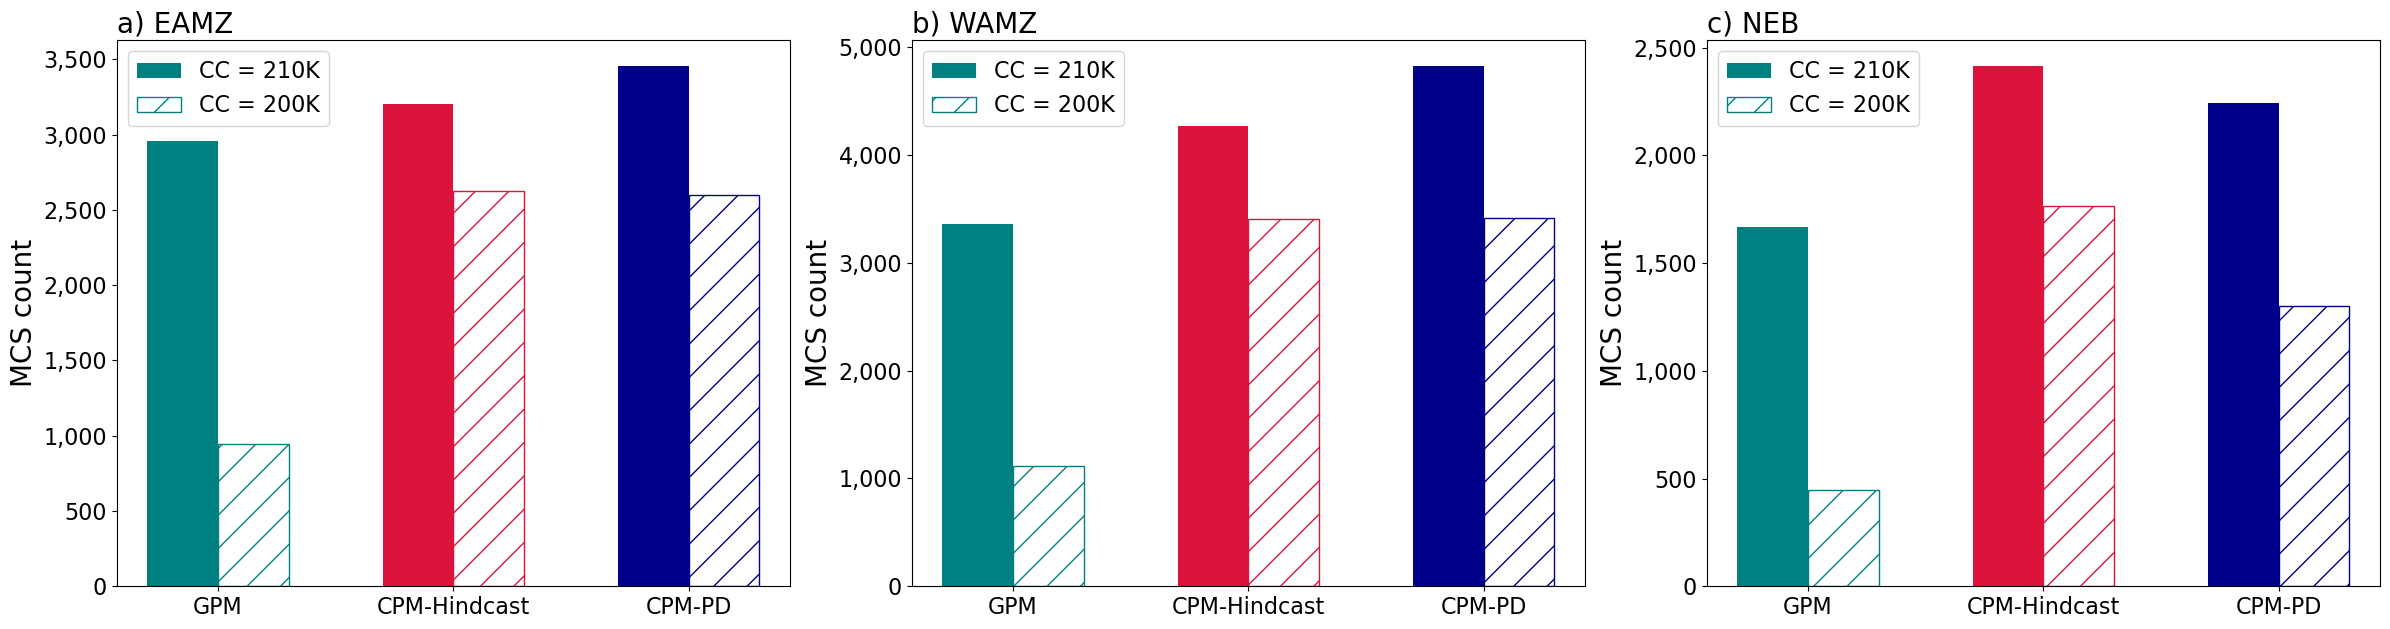

In [108]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
from matplotlib.ticker import StrMethodFormatter

N = 3
ind = np.arange(N) 
width = 0.3

fig = plt.figure(figsize =(24, 12))

ax1 = fig.add_subplot(231)

# Choose the height of the bars
orig_height = [np.unique(eamz_tracks_obs.cell.values).shape[0],np.unique(eamz_tracks_cpm.cell.values).shape[0],np.unique(eamz_tracks_pd.cell.values).shape[0]]
new_height = [np.unique(eamz_tracks_obs_lowTb.cell.values).shape[0],np.unique(eamz_tracks_cpm_lowTb.cell.values).shape[0],np.unique(eamz_tracks_pd_lowTb.cell.values).shape[0]]

bars = ('GPM', 'CPM-Hindcast', 'CPM-PD')
x_pos = np.arange(len(bars))

c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

orig = orig_height
bar1 = ax1.bar(bars, orig, width, color = c,label='CC = 210K')
  
new = new_height
bar2 = ax1.bar(ind+width, new, width, color= 'white', edgecolor=c,hatch='/',label='CC = 200K')

ax1.set_xticks(ind+width*0.5, fontsize=20)
ax1.set_xticklabels(bars, fontsize=16)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=16)
ax1.set_ylabel('MCS count',fontsize=20)
ax1.set_title('a) EAMZ',fontsize=20,loc='left')
ax1.legend(loc='best', fontsize=16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


ax2 = fig.add_subplot(232)

# Choose the height of the bars
orig_height = [np.unique(wamz_tracks_obs.cell.values).shape[0],np.unique(wamz_tracks_cpm.cell.values).shape[0],np.unique(wamz_tracks_pd.cell.values).shape[0]]
new_height = [np.unique(wamz_tracks_obs_lowTb.cell.values).shape[0],np.unique(wamz_tracks_cpm_lowTb.cell.values).shape[0],np.unique(wamz_tracks_pd_lowTb.cell.values).shape[0]]

bars = ('GPM', 'CPM-Hindcast', 'CPM-PD')
x_pos = np.arange(len(bars))

c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

orig = orig_height
bar1 = ax2.bar(bars, orig, width, color = c,label='CC = 210K')
  
new = new_height
bar2 = ax2.bar(ind+width, new, width, color= 'white', edgecolor=c,hatch='/',label='CC = 200K')

ax2.set_xticks(ind+width*0.5, fontsize=20)
ax2.set_xticklabels(bars, fontsize=16)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=16)
ax2.set_ylabel('MCS count',fontsize=20)
ax2.set_title('b) WAMZ',fontsize=20,loc='left')
ax2.legend(loc='best', fontsize=16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax3 = fig.add_subplot(233)

# Choose the height of the bars
orig_height = [np.unique(neb_tracks_obs.cell.values).shape[0],np.unique(neb_tracks_cpm.cell.values).shape[0],np.unique(neb_tracks_pd.cell.values).shape[0]]
new_height = [np.unique(neb_tracks_obs_lowTb.cell.values).shape[0],np.unique(neb_tracks_cpm_lowTb.cell.values).shape[0],np.unique(neb_tracks_pd_lowTb.cell.values).shape[0]]

bars = ('GPM', 'CPM-Hindcast', 'CPM-PD')
x_pos = np.arange(len(bars))

c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

orig = orig_height
bar1 = ax3.bar(bars, orig, width, color = c,label='CC = 210K')
  
new = new_height
bar2 = ax3.bar(ind+width, new, width, color= 'white', edgecolor=c,hatch='/',label='CC = 200K')

ax3.set_xticks(ind+width*0.5, fontsize=20)
ax3.set_xticklabels(bars, fontsize=16)
ax3.set_yticklabels(ax3.get_yticks(), fontsize=16)
ax3.set_ylabel('MCS count',fontsize=20)
ax3.set_title('c) NEB',fontsize=20,loc='left')
ax3.legend(loc='best', fontsize=16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

fig.tight_layout()